

# <center> Project 3 - GERMAN CREDIT DATA PREDICTION <center>

<hr style="border:2px  solid black"> </hr>


### TABLE OF CONTENTS
    
1. [Importing the Libraries](#lib_import)
2. [Exploring the 'German Credit' Dataset](#explore-ds)
3. [Data Preparation](#data_prep)
      
    * [Check for categorical values and onehot encoding](#cen)
    * [Check for null values](#null)
    * [Check for target variable distribution](#imb)
    * [Check the distribution of data using histograms](#hist)
    * [Applying Feature Scaling](#ssc)
    
4. [Elbow method and K-means clustering implementation](#km)
5. [PCA](#pca)
6. [Data Modelling](#dm)
    * [Train_test_split](#tts)
    * [Cross Validation](#cv)
    * [Implementing SVC](#svc)
    * [Model Evaluation](#me)
7. [Conclusion](#cln)


<hr style="border:.1px  solid  gray"> </hr>

## <CENTER> IMPORTING THE LIBRARIES<a name="lib_import"></a>


<hr style="border:01px  solid gray"> </hr>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import sklearn

#importing the library for visulasing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smq
%matplotlib inline

#importing librarues for scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#importing library for train_test_split, cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#importing SVC algo and Kmeans
from sklearn.cluster import KMeans
from sklearn.svm import SVC

#importing metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)




In [2]:
#Reading the csv dataset
df = pd.read_csv('german_credit_data.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<hr style="border:01px  solid gray"> </hr>

## <center>EXPLORING THE GERMAN CREDIT DATASET<a name="explore-ds"></a>
    

<hr style="border:01px  solid gray"> </hr>

Here, we would be exploring the dataset in general, like the below: 

* Shape, column names and size of the dataset
* Unique values of target variable. 
* Descirptive statistics.
* Datatype and overview . 
* Count of values of each feature and the target variable.

In [3]:
df.shape

(1000, 10)

In [4]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [7]:
df.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

***

**OBSERVATION**

* From the above cells, we infer that the German Credit dataset has 1000 rows with 10 columns. 
* In `cell 4`, the column names are retreived.
* The datatype is obtained from the `info()` keyword,in `cell5` which states they are a mix of numeric values(integer) and non-numeric.
* In `cell 6`, `describe()` , shows the descriptive statistics of the data set. 
* Also, in `cell 7` , we check for the unique values present in the categorical target feature `Risk'. 
* `Cell 7`, shows the `value_counts` found in the variable `Risk`. `Risk` is a binary classification having `good` and `bad` and is imabalanced.


***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA PREPARATION <a name="data_prep"></a>

<hr style="border:01px  solid gray"> </hr>


In this section, we will be performing data preparation steps like the below: 
1. [Check for categorical values and onehot encoding](#cen)
2. [Check for null values](#null)
3. [Check for target variable distribution](#imb)
4. [Check the distribution of data using histograms](#hist)
5. [Applying Feature Scaling](#ssc)


***

### 1. Check for categorical values and one-hot encode:

<a name="cen"></a>

In [8]:
print("Sex : ",df.Sex.unique())
print("\n")
print("Housing : ",df.Housing.unique())
print("\n")
print("Saving accounts : ",df['Saving accounts'].unique())
print("\n")
print("Checking account : ",df['Checking account'].unique())
print("\n")
print("Purpose :",df.Purpose.unique())
print("\n")
print("Risk : ",df['Risk'].unique())



Sex :  ['male' 'female']


Housing :  ['own' 'free' 'rent']


Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']


Checking account :  ['little' 'moderate' nan 'rich']


Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Risk :  ['good' 'bad']


In [9]:
df['Sex'] = df['Sex'].map({"male":0,"female":1}).astype(float)

df['Housing'] = df['Housing'].map({"own":0,"free":1,"rent":2}).astype(float)

df['Saving accounts'] = df['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 })
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].dropna().mean())

df['Checking account'] = df['Checking account'].map({"little":0,"moderate":1,"rich":2 });
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].dropna().mean())


df['Purpose'] = df['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float)


In [10]:

df['Risk'] = df['Risk'].map({'good' : 0 , 'bad' : 1}).astype(int)

In [11]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0.0,2,0.0,0.456548,0.000000,1169,6,0.0,0
1,22,1.0,2,0.0,0.000000,1.000000,5951,48,0.0,1
2,49,0.0,1,0.0,0.000000,0.651815,2096,12,1.0,0
3,45,0.0,2,1.0,0.000000,0.000000,7882,42,2.0,0
4,53,0.0,2,1.0,0.000000,0.000000,4870,24,3.0,1
5,35,0.0,1,1.0,0.456548,0.651815,9055,36,1.0,0
6,53,0.0,2,0.0,2.000000,0.651815,2835,24,2.0,0
7,35,0.0,3,2.0,0.000000,1.000000,6948,36,3.0,0
8,61,0.0,1,0.0,3.000000,0.651815,3059,12,0.0,0
9,28,0.0,3,0.0,0.000000,1.000000,5234,30,3.0,1


### 2. Check for null and Nan values:

<a name="null"></a>

In [12]:
#check for null values
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [13]:
#check for Nan values
df.isna().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [14]:
#duplicate values are checked for :
print("CHECK FOR DUPLICATE VALUES:\n",df.duplicated().value_counts())

CHECK FOR DUPLICATE VALUES:
 False    1000
dtype: int64


### 3. Check for target variable distribution:

<a name="imb"></a>

<AxesSubplot:xlabel='Risk', ylabel='count'>

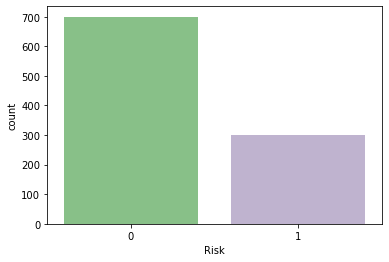

In [15]:
# To check for class imabalance distribution in target variable'Channel'
sns.countplot(x ='Risk' , data=df, palette="Accent" )


### 4. Histogram Plots:

<a name="hist"></a>

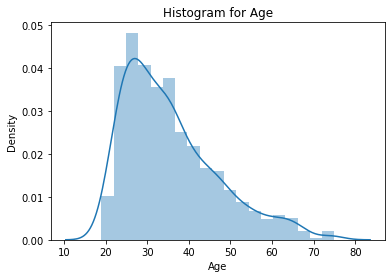

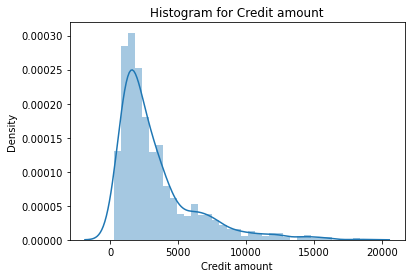

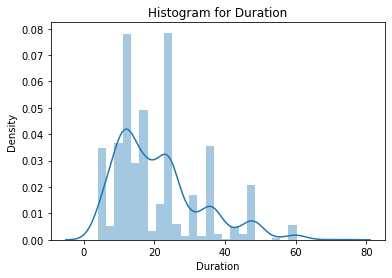

In [16]:
#histogram plotting using pandas

for feature in ["Age" , "Credit amount","Duration"]:
    sns.distplot(df[feature], kde=True)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

***

<b>OBSERVATION:</b>

From the above kde histogram, 
* We can infer that, most of the features are not evenly distributed. 
* The features exhibits highest right skewness, from `cell 16`
* No signs of normal distribution.
* Kde hist plot is used.

<u>**NOTE**</u> Transforming the features using `log_transformation` would be mandatory to bring them in range prior prediction because of right skewedness.



***

In [17]:
df_log = np.log(df[['Age', 'Credit amount','Duration']])

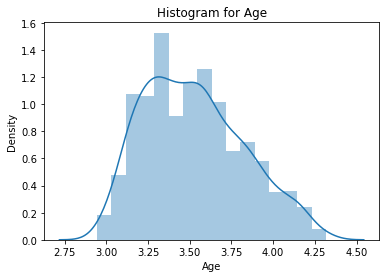

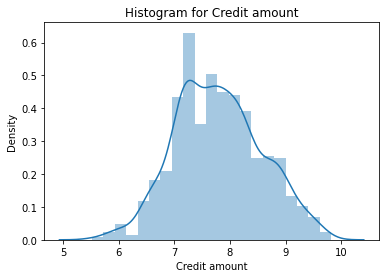

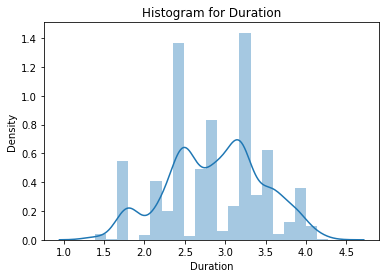

In [18]:
#histogram plotting using pandas

for feature in ["Age" , "Credit amount","Duration"]:
    sns.distplot(df_log[feature], kde=True)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

***

<b>OBSERVATION:</b>

From the above kde histogram, 
* After applying log_transformation, we can observe that a normal distribution prevails. 


***

### 5.Applying Feature Scaling:

<a name="ssc"></a>

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

In [20]:
df_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

<hr style="border:01px  solid gray"> </hr>

## <center>ELBOW METHOD & IMPLEMENTING K-MEANS <a name="km"></a>

<hr style="border:01px  solid gray"> </hr>

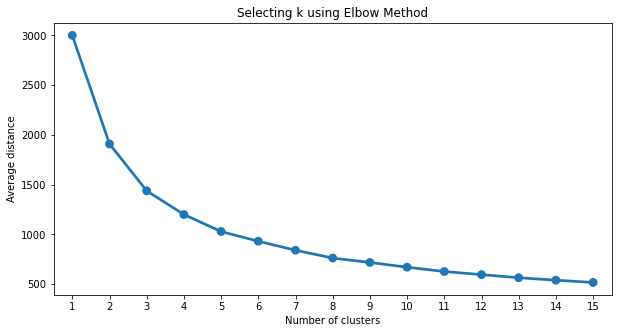

In [21]:
from sklearn.cluster import KMeans

sse = {}

for k in range(1,16):
    kmeans = KMeans(n_clusters = k, random_state=123)
    cluster_labels = kmeans.fit_predict(df_scaled)
    sse[k] = kmeans.inertia_
   
plt.figure(figsize=(10,5))
plt.title('Selecting k using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))

plt.show()


In [22]:
# Interpret 3 cluster solution
mode3Cluster = KMeans(n_clusters=3)
mode3Cluster.fit(df_scaled)
preds=mode3Cluster.predict(df_scaled)


In [23]:
mode3Cluster.cluster_centers_

array([[ 1.15085046, -0.51841098, -0.60085417],
       [-0.70711626, -0.58807404, -0.52100196],
       [-0.09479942,  0.93238099,  0.92306198]])

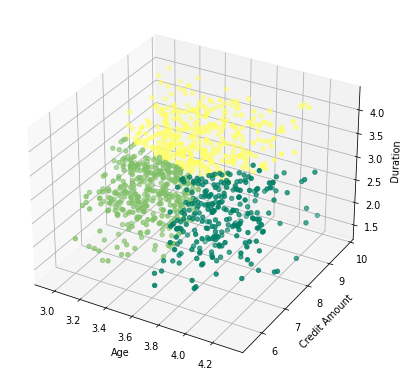

In [24]:
#visulaizing the clusters in 3d

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(7,7), dpi=70, facecolor='w', edgecolor='b')
ax = plt.axes(projection="3d")
ax.scatter3D(df_log['Age'],df_log['Credit amount'],df_log['Duration'],c=mode3Cluster.labels_, cmap='summer')

xLabel = ax.set_xlabel('Age')
yLabel = ax.set_ylabel('Credit Amount')
zLabel = ax.set_zlabel('Duration')

***

**OBSERVATION:**

* Elbow method is applied to find out the optimal clusters needed within the given range (1-15).
* We see from `cell 21` , three would be the approprite number of clusters.
* K-means clustering is applied on the `df_scaled`with `n_clusters=3`.
* With `cluster_centers_` , the centroids values are got. 
* In `cell 24` , a 3d view of the clusters segmented is got. We see that the clusters are well formed and segmented. 

<hr style="border:.03px  solid black"> </hr>

<hr style="border:01px  solid gray"> </hr>

## <center>PCA <a name="pca"></a>

<hr style="border:01px  solid gray"> </hr>

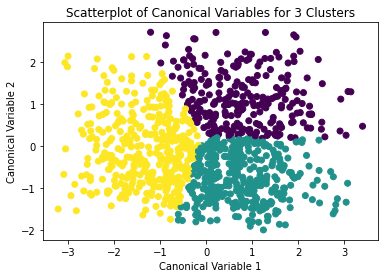

In [25]:
# Squash the data into 2D
from sklearn.decomposition import PCA
pca = PCA(3)
plot_columns = pca.fit_transform(df_scaled)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode3Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

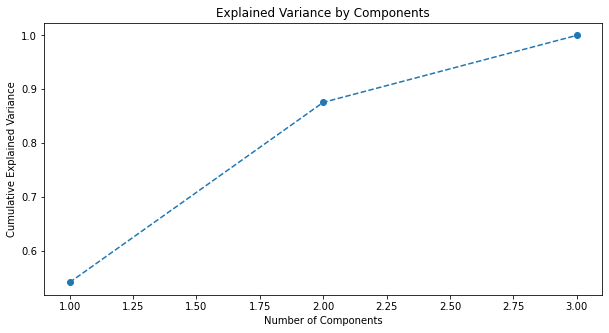

In [26]:
#plotting Explained Variance
plt.figure(figsize = (10,5))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

* Initially, PCA is applied considering all the features of the dataset in `cell 25`.
* In `cell 25`, visualization of clusters are done using scatter plot with first and second components. 
* We see that 3 clusters looks reasonable to identify similar samples within our data.
* In `cell 26` , plotting of explained variance by components is visualized. 
* we can infer from `cell 26` that, the first two components are able to retain the original information accounting to 85% of the total and all the 3 components accounts to almost 100%.

***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA MODELLING<a name="dm"></a>

<hr style="border:01px  solid gray"> </hr>

In DataModelling, the following steps are performed
1. [Train_test_split](#tts)
2. [Implementing SVC](#xgb)
3. [Cross Validation](#cv)
4. [Model evaluation](#me)
    

###  1. Train_Test_Split: <a name="tts"></a>

In [27]:
#splitting features and traget variable
X = df.drop('Risk', axis=1)
y = df['Risk']

In [28]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
# shape of the dataset
print('Shape of training data :',X_train.shape)
print('Shape of testing data :',X_test.shape)

Shape of training data : (700, 9)
Shape of testing data : (300, 9)


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

* With **Train_Test_Split**, the train set is 70% and test set is 30%. 
* Shape is checked in `cell 28`
* Scaling is done so as to bring the features in range especially as the dataest has Age feature. 

***

### 2. Cross Validation: <a name="cv"></a> 

In [31]:
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
svc_model = SVC()
# evaluate model
scores = cross_val_score(svc_model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)


In [32]:
print("Cross validation scores:\n",scores)

Cross validation scores:
 [0.69285714 0.69285714 0.73571429 0.73571429 0.69285714]


In [33]:
print("The average accuracy for Support Vector is :",scores.mean()*100)

The average accuracy for Support Vector is : 71.0




<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

* In `cell 31` , **StratifiedKFold** is applied. 
* In `cell32` , cv scores are printed with ranges from 69% to a maximum of 73%.
* In `cell33` ,the average of **CV** score is printed 71%. 

NOTE : Stratified k-fold is used,  as target data is imbalanced and has no outliers removed. 

***

### 3.Implementing SVC: <a name="svc"></a>

In [34]:
svc = SVC()
svc.fit(X_train_scaled , y_train)
y_pred = svc.predict(X_test_scaled)

In [35]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

### 4.Model evaluation :<a name="me"></a>

In [36]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score
print('SVC model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC model accuracy score: 0.7367


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)


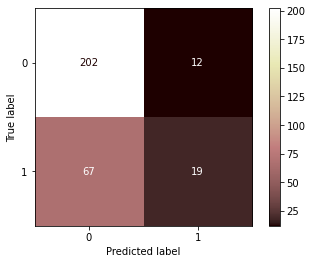

In [38]:
plot_confusion_matrix(svc, X_test_scaled, y_test, cmap = "pink")  
plt.show()  


**OBSERVATION**

* When **SVC** was implemented on the dataset, an accuracy score of 73.67% was achieved, which can be infered from `cell36`.
* `cell 37` has confusion matrix printed. 
* In `cell 38`, confusion_matrix is plotted, we can infer that , SVC has classifed 221 classes correctly out of 300. 


<hr style="border:.03px  solid black"> </hr>

<hr style="border:01px  solid gray"> </hr>

## <center>CONCLUSION<a name="cln"></a>
    
<hr style="border:01px  solid gray"> </hr>

* With regards to clustering, we can conclude that 3 clusters are ideal for this german credit dataset.
* DBSCAN couldn't cluster properly when tried implementing. Hence, for this dataset, K-means is apt.
* With regard to SVC, From the above implementation and evalutaion, we can say for this particular model of implementing SVC models, the maximum score achievable is 73.67%.  
* Also, when tried with Xgboot classifier , the prediction score achieved was 65%. 
* Also, with train_test_split_ratio = 80:20 , the maximum score SVC acheived was 70%
